<a href="https://colab.research.google.com/github/iamomtiwari/Statistical-Machine-Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/wholesale.csv')

In [ ]:
df.head()

COMM_NAME   COMM_CODE  COMM_WT  INDX042012  INDX052012  INDX062012  \
0         Bajra  1101010104  0.08637       107.7       109.3       107.0   
1         Moong  1101010203  0.07088        96.3        96.0        96.6   
2         Masur  1101010204  0.05299       102.5       107.4       109.7   
3  Peas/Chawali  1101010206  0.02444       113.2       123.1       134.3   
4   Cauliflower  1101020108  0.16697       119.1         0.0         0.0   

   INDX072012  INDX082012  INDX092012  INDX102012  ...  INDX012023  \
0       113.9       120.7       121.7       114.8  ...       224.1   
1       103.6       108.7       108.4       112.2  ...       167.7   
2       115.2       119.2       119.0       118.6  ...       199.0   
3       147.4       143.3       153.8       146.6  ...       160.4   
4         0.0         0.0       134.6       129.4  ...       161.1   

   INDX022023  INDX032023  INDX042023  INDX052023  INDX062023  INDX072023  \
0       219.6       225.1       229.6       229.4       226.7       226.9   
1       167.8       172.8       180.8       178.6       184.8       188.7   
2       196.3       194.6       192.1       188.1       187.7       186.6   
3       160.2       166.9       195.5       199.5       196.0       215.9   
4       148.4       163.5       176.9         0.0         0.0         0.0   

   INDX082023  INDX092023  INDX102023  
0       225.9       225.7       231.5  
1       189.4       199.7       205.6  
2       186.9       192.6       189.5  
3       219.8       227.4       237.6  
4         0.0       230.3       244.6  

[5 rows x 142 columns]

In [ ]:
df.describe()

COMM_CODE     COMM_WT  INDX042012  INDX052012  INDX062012  \
count  8.690000e+02  868.000000  869.000000  869.000000  869.000000   
mean   1.275946e+09    0.568565  103.852589  103.687572  104.550173   
std    8.216739e+07    4.219486   10.765165   12.845610   12.422794   
min    1.000000e+09    0.000020    0.000000    0.000000    0.000000   
25%    1.301100e+09    0.022367  100.500000  100.700000  101.500000   
50%    1.310070e+09    0.075520  103.100000  103.700000  104.100000   
75%    1.316040e+09    0.241160  106.600000  106.800000  107.300000   
max    2.000000e+09  100.000000  245.200000  253.400000  216.400000   

       INDX072012  INDX082012  INDX092012  INDX102012  INDX112012  ...  \
count  869.000000  869.000000  869.000000  869.000000  869.000000  ...   
mean   105.507480  105.660069  105.875144  106.068585  106.429229  ...   
std     13.529574   13.975477   13.797784   12.792478   12.121561  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%    101.600000  101.800000  102.100000  102.000000  101.700000  ...   
50%    104.700000  104.900000  105.200000  105.300000  105.300000  ...   
75%    108.500000  109.600000  109.500000  109.500000  109.600000  ...   
max    194.600000  198.000000  189.400000  181.200000  185.200000  ...   

       INDX012023  INDX022023  INDX032023  INDX042023  INDX052023  INDX062023  \
count  869.000000  869.000000  869.000000  869.000000  869.000000  869.000000   
mean   148.453395  148.529114  148.270771  148.600690  147.107940  147.203797   
std     43.821126   42.668332   40.470594   40.000942   41.081976   42.103654   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    124.300000  124.800000  125.200000  126.000000  125.000000  124.200000   
50%    140.600000  140.900000  140.900000  141.000000  140.300000  139.300000   
75%    163.100000  162.900000  162.400000  162.400000  161.200000  160.400000   
max    640.500000  558.000000  472.700000  400.500000  433.100000  536.200000   

        INDX072023  INDX082023  INDX092023  INDX102023  
count   869.000000  869.000000  869.000000  869.000000  
mean    149.118067  149.047641  148.685501  149.679171  
std      55.016715   51.542506   46.186661   46.654536  
min       0.000000    0.000000    0.000000    0.000000  
25%     124.400000  124.800000  125.000000  125.200000  
50%     139.400000  139.800000  140.500000  140.400000  
75%     161.500000  160.800000  162.800000  163.600000  
max    1043.600000  813.900000  548.200000  497.400000  

[8 rows x 141 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Columns: 142 entries, COMM_NAME to INDX102023
dtypes: float64(140), int64(1), object(1)
memory usage: 964.2+ KB


In [ ]:
df.tail()

COMM_NAME   COMM_CODE  COMM_WT  INDX042012  \
864                  Gold & gold ornaments  1322010001  0.96561        91.2   
865  b. Manufacture of musical instruments  1322020000  0.00124       108.8   
866                     Table Tennis Table  1322030005  0.00080       105.0   
867            Plastic moulded-others toys  1322040003  0.00210       106.7   
868                    Non Mechanical Toys  1322040004  0.00014       107.0   

     INDX052012  INDX062012  INDX072012  INDX082012  INDX092012  INDX102012  \
864        88.2        85.2        91.9        87.9       102.3       106.5   
865       101.6       107.5       117.4       103.0       112.2       100.0   
866       105.0       107.3       107.3       107.3       107.3       107.3   
867       106.3       106.0       105.3       103.7       106.0       104.7   
868       107.0       107.0       107.0       107.0       107.0       107.0   

     ...  INDX012023  INDX022023  INDX032023  INDX042023  INDX052023  \
864  ...       151.1       154.0       154.3       159.9       158.5   
865  ...       185.6       200.4       201.4       193.9       187.7   
866  ...       145.1       145.1       145.1       145.1       145.1   
867  ...       148.0       147.8       146.6       147.2       148.0   
868  ...       208.5       208.5       207.0       207.0       207.8   

     INDX062023  INDX072023  INDX082023  INDX092023  INDX102023  
864       158.2       151.0       154.9       155.0       153.7  
865       181.1       193.1       179.0       180.3       189.4  
866       145.7       145.7       145.7       145.7       145.7  
867       147.6       148.6       148.6       148.7       149.4  
868       207.8       208.5       210.0       211.5       211.5  

[5 rows x 142 columns]

In [ ]:
df.shape

(869, 142)

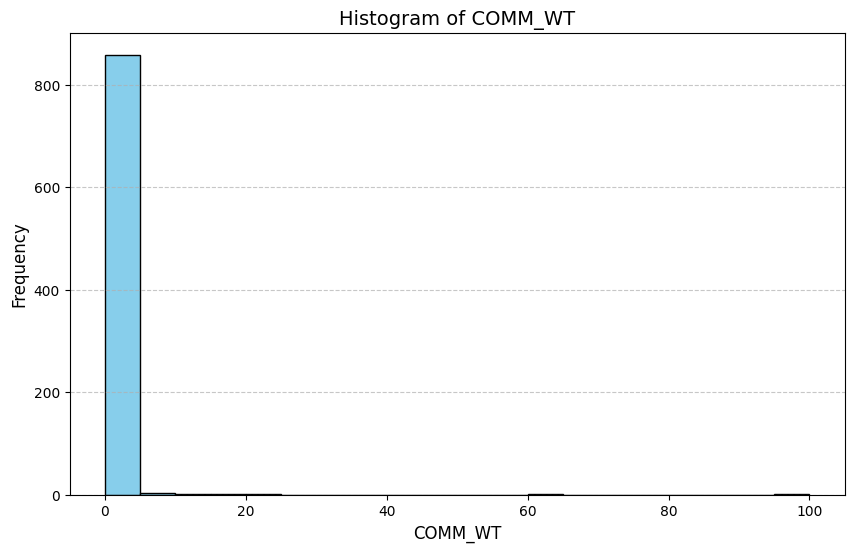

In [ ]:
hist_column = 'COMM_WT'
scatter_x = 'COMM_WT'
scatter_y = 'INDX102012'
plt.figure(figsize=(10, 6))
plt.hist(df[hist_column], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {hist_column}', fontsize=14)
plt.xlabel(hist_column, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

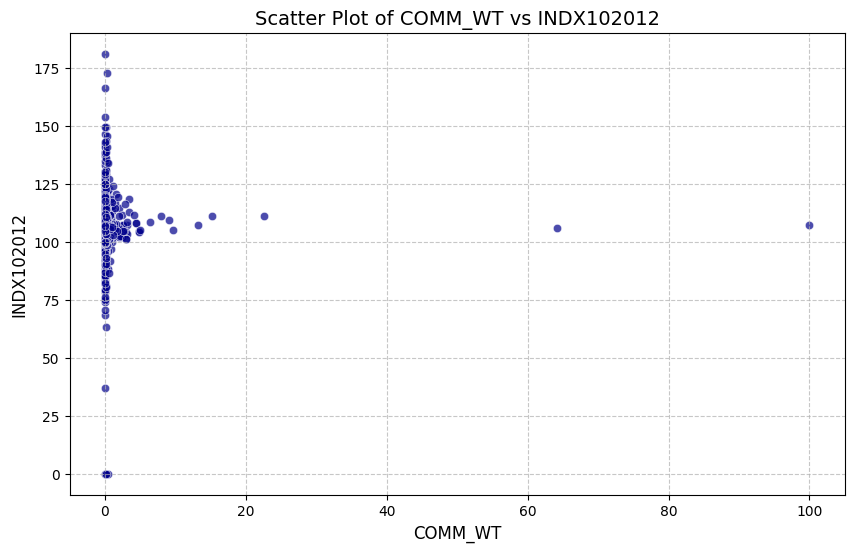

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=scatter_x, y=scatter_y, color='darkblue', alpha=0.7)
plt.title(f'Scatter Plot of {scatter_x} vs {scatter_y}', fontsize=14)
plt.xlabel(scatter_x, fontsize=12)
plt.ylabel(scatter_y, fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

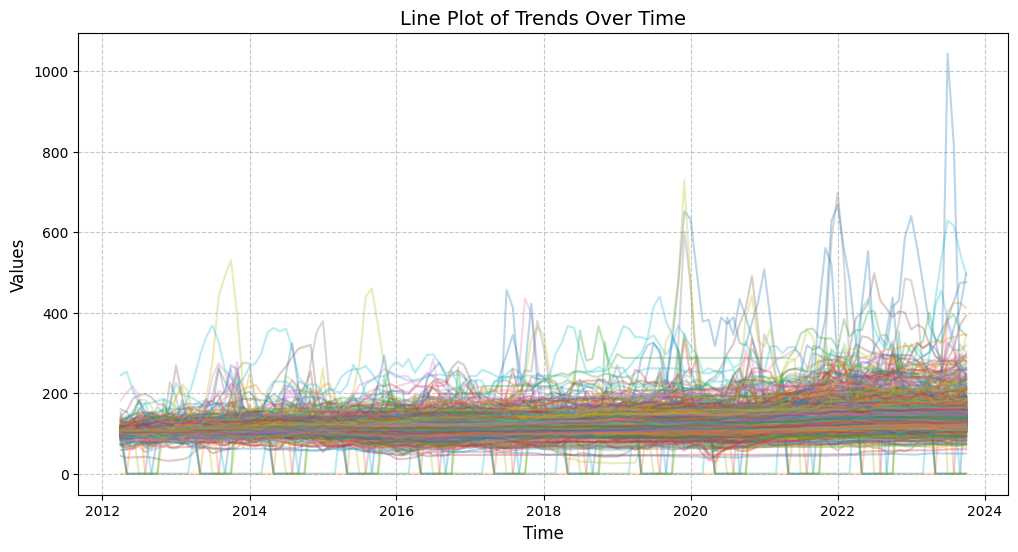

In [ ]:
indx_columns = [col for col in df.columns if col.startswith('INDX')]
time_series_data = df[indx_columns]
time_series_data.columns = pd.to_datetime([col.replace('INDX', '') for col in indx_columns], format='%m%Y')
plt.figure(figsize=(12, 6))
for index, row in time_series_data.iterrows():
    plt.plot(time_series_data.columns, row, alpha=0.3)
plt.title('Line Plot of Trends Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

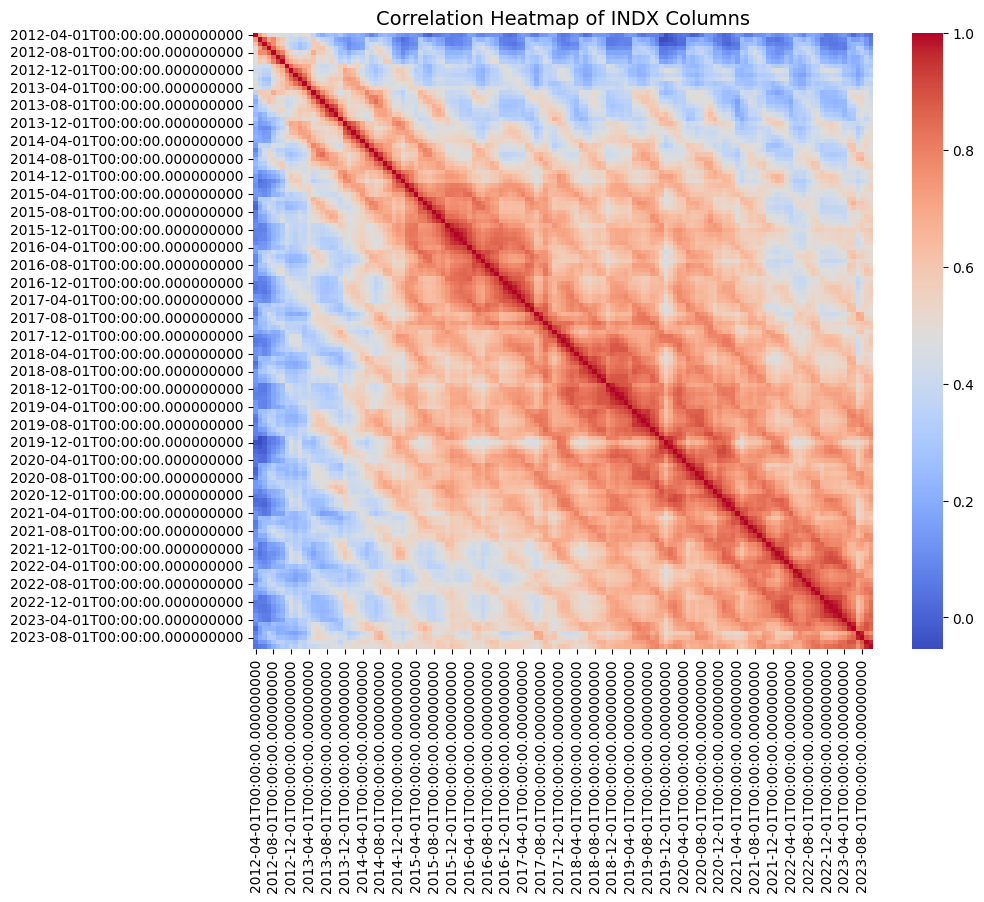

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = time_series_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of INDX Columns', fontsize=14)
plt.show()

Data Preprocessing

In [ ]:
df.isnull().sum()

COMM_NAME     0
COMM_CODE     0
COMM_WT       1
INDX042012    0
INDX052012    0
             ..
INDX062023    0
INDX072023    0
INDX082023    0
INDX092023    0
INDX102023    0
Length: 142, dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df=df.drop('COMM_NAME',axis=1)

In [ ]:
df.isnull().sum()

COMM_CODE     0
COMM_WT       0
INDX042012    0
INDX052012    0
INDX062012    0
             ..
INDX062023    0
INDX072023    0
INDX082023    0
INDX092023    0
INDX102023    0
Length: 141, dtype: int64

Box plots

In [ ]:
# fig,axs=plt.subplots(9,1,dpi=95,figsize=(10,30))
# i=0
# for col in df.columns:
#   axs[i].boxplot(df[col],vert=False)
#   axs[i].set_ylabel(col)
#   i+=1
# plt.show()

import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

fig, axs = plt.subplots(nrows=len(numeric_df.columns), figsize=(8, 5 * len(numeric_df.columns)))

for i, col in enumerate(numeric_df.columns):
    axs[i].boxplot(numeric_df[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
#correlation
corr=df.corr()
corr

COMM_CODE   COMM_WT  INDX042012  INDX052012  INDX062012  \
COMM_CODE    1.000000 -0.134201   -0.081090    0.044366    0.000839   
COMM_WT     -0.134201  1.000000    0.010114    0.015647    0.008820   
INDX042012  -0.081090  0.010114    1.000000    0.740732    0.621940   
INDX052012   0.044366  0.015647    0.740732    1.000000    0.880624   
INDX062012   0.000839  0.008820    0.621940    0.880624    1.000000   
...               ...       ...         ...         ...         ...   
INDX062023  -0.388070  0.007232    0.024297    0.159343    0.232558   
INDX072023  -0.387099  0.009908    0.078789    0.162970    0.250344   
INDX082023  -0.399621  0.011287    0.103233    0.203464    0.236636   
INDX092023  -0.409675  0.009655    0.057622    0.136749    0.141654   
INDX102023  -0.446280  0.008816    0.033044    0.059847    0.070190   

            INDX072012  INDX082012  INDX092012  INDX102012  INDX112012  ...  \
COMM_CODE    -0.062269   -0.025738   -0.000606   -0.025373   -0.114693  ...   
COMM_WT       0.007792    0.012308    0.015501    0.013101    0.009587  ...   
INDX042012    0.478878    0.520625    0.471791    0.476803    0.473592  ...   
INDX052012    0.724092    0.770048    0.625963    0.583558    0.443923  ...   
INDX062012    0.873326    0.765909    0.611585    0.556298    0.421954  ...   
...                ...         ...         ...         ...         ...  ...   
INDX062023    0.229324    0.230610    0.201655    0.208894    0.233855  ...   
INDX072023    0.345515    0.282407    0.204615    0.214069    0.199068  ...   
INDX082023    0.321127    0.333039    0.265174    0.271874    0.253533  ...   
INDX092023    0.213812    0.288184    0.347381    0.352208    0.308611  ...   
INDX102023    0.143545    0.206148    0.266684    0.316891    0.302963  ...   

            INDX012023  INDX022023  INDX032023  INDX042023  INDX052023  \
COMM_CODE    -0.379817   -0.391186   -0.405552   -0.430675   -0.368127   
COMM_WT       0.007097    0.007679    0.009230    0.009792    0.008824   
INDX042012    0.062117    0.086370    0.126955    0.141143    0.087238   
INDX052012    0.051560    0.060810    0.086137    0.093246    0.212432   
INDX062012    0.047775    0.048970    0.067486    0.068602    0.210823   
...                ...         ...         ...         ...         ...   
INDX062023    0.769712    0.807777    0.842898    0.880072    0.968990   
INDX072023    0.614052    0.640202    0.681143    0.699109    0.761317   
INDX082023    0.673322    0.695308    0.737769    0.763961    0.829450   
INDX092023    0.777459    0.795222    0.836071    0.843701    0.896139   
INDX102023    0.834860    0.844698    0.865472    0.848953    0.866821   

            INDX062023  INDX072023  INDX082023  INDX092023  INDX102023  
COMM_CODE    -0.388070   -0.387099   -0.399621   -0.409675   -0.446280  
COMM_WT       0.007232    0.009908    0.011287    0.009655    0.008816  
INDX042012    0.024297    0.078789    0.103233    0.057622    0.033044  
INDX052012    0.159343    0.162970    0.203464    0.136749    0.059847  
INDX062012    0.232558    0.250344    0.236636    0.141654    0.070190  
...                ...         ...         ...         ...         ...  
INDX062023    1.000000    0.828855    0.859974    0.889116    0.855415  
INDX072023    0.828855    1.000000    0.971883    0.795539    0.760376  
INDX082023    0.859974    0.971883    1.000000    0.883212    0.847317  
INDX092023    0.889116    0.795539    0.883212    1.000000    0.969981  
INDX102023    0.855415    0.760376    0.847317    0.969981    1.000000  

[141 rows x 141 columns]

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

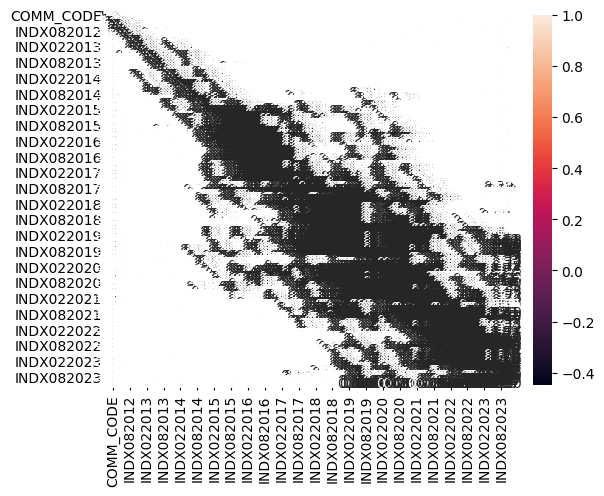

In [ ]:
plt.figure()
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
corr['COMM_WT'].sort_values(ascending=False)

COMM_WT       1.000000
INDX052022    0.018908
INDX062022    0.018320
INDX052012    0.015647
INDX092012    0.015501
                ...   
INDX042016   -0.027409
INDX012016   -0.029587
INDX032016   -0.030321
INDX022016   -0.031652
COMM_CODE    -0.134201
Name: COMM_WT, Length: 141, dtype: float64

Normalisation

In [ ]:
scaler=sk.preprocessing.MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_norm.head()

COMM_CODE   COMM_WT  INDX042012  INDX052012  INDX062012  INDX072012  \
0   0.313647  0.000864    0.439233    0.431334    0.494455    0.585303   
1   0.313648  0.000709    0.392741    0.378848    0.446396    0.532374   
2   0.313648  0.000530    0.418026    0.423836    0.506932    0.591984   
3   0.313648  0.000244    0.461664    0.485793    0.620610    0.757451   
4   0.313678  0.001670    0.485726    0.000000    0.000000    0.000000   

   INDX082012  INDX092012  INDX102012  INDX112012  ...  INDX012023  \
0    0.609596    0.642555    0.633554    0.650108  ...    0.349883   
1    0.548990    0.572334    0.619205    0.612851  ...    0.261827   
2    0.602020    0.628300    0.654525    0.637689  ...    0.310695   
3    0.723737    0.812038    0.809051    0.711663  ...    0.250429   
4    0.000000    0.710665    0.714128    0.549136  ...    0.251522   

   INDX022023  INDX032023  INDX042023  INDX052023  INDX062023  INDX072023  \
0    0.393548    0.476201    0.573283    0.529670    0.422790    0.217420   
1    0.300717    0.365560    0.451436    0.412376    0.344648    0.180816   
2    0.351792    0.411678    0.479650    0.434311    0.350056    0.178804   
3    0.287097    0.353078    0.488140    0.460633    0.365535    0.206880   
4    0.265950    0.345885    0.441698    0.000000    0.000000    0.000000   

   INDX082023  INDX092023  INDX102023  
0    0.277553    0.411711    0.465420  
1    0.232707    0.364283    0.413349  
2    0.229635    0.351332    0.380981  
3    0.270058    0.414812    0.477684  
4    0.000000    0.420102    0.491757  

[5 rows x 141 columns]

In [ ]:
scaler=sk.preprocessing.StandardScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_norm.head()

COMM_CODE   COMM_WT  INDX042012  INDX052012  INDX062012  INDX072012  \
0  -2.220638 -0.114344    0.357621    0.437178    0.197572    0.620773   
1  -2.220637 -0.118017   -0.701372   -0.598223   -0.639645   -0.140580   
2  -2.220637 -0.122259   -0.125429    0.289264    0.414927    0.716866   
3  -2.220637 -0.129030    0.868539    1.511505    2.395267    3.097017   
4  -2.220511 -0.095231    1.416614   -8.071801   -8.416104   -7.798457   

   INDX082012  INDX092012  INDX102012  INDX112012  ...  INDX012023  \
0    1.076708    1.147480    0.682989    1.153084  ...    1.727140   
1    0.217986    0.183468    0.479731    0.583804  ...    0.439884   
2    0.969368    0.951779    0.980059    0.963324  ...    1.154266   
3    2.693968    3.474156    3.168997    2.093635  ...    0.273272   
4   -7.560603    2.082499    1.824364   -0.389748  ...    0.289248   

   INDX022023  INDX032023  INDX042023  INDX052023  INDX062023  INDX072023  \
0    1.666547    1.899455    2.026138    2.004297    1.889349    1.415039   
1    0.452333    0.606900    0.805883    0.767464    0.893934    0.720497   
2    1.120385    1.145670    1.088442    0.998762    0.962829    0.682315   
3    0.274186    0.461086    1.173460    1.276319    1.160011    1.215040   
4   -0.002412    0.377057    0.708362   -3.580930   -3.496346   -2.710394   

   INDX082023  INDX092023  INDX102023  
0    1.492368    1.668601    1.754951  
1    0.783992    1.105534    1.199669  
2    0.735473    0.951773    0.854494  
3    1.373982    1.705417    1.885732  
4   -2.891801    1.768221    2.035809  

[5 rows x 141 columns]

Linear regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# Split data
X = df_norm.drop('COMM_WT', axis=1)
Y = df_norm['COMM_WT']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Train model


In [ ]:
# 2. Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)  # Use Y_train here

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3. Supervised Models
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


In [ ]:
print("Supervised Model Results:")
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    print(f"{name} --> R²: {r2:.3f}, MSE: {mse:.3f}")

Supervised Model Results:
Ridge --> R²: -0.118, MSE: 1.535
Lasso --> R²: -0.002, MSE: 1.375
Decision Tree --> R²: -0.022, MSE: 1.402
Random Forest --> R²: 0.008, MSE: 1.361
SVR --> R²: 0.006, MSE: 1.363
KNN --> R²: 0.009, MSE: 1.360
Gradient Boosting --> R²: 0.008, MSE: 1.362


In [ ]:
# 4. Unsupervised Learning - Clustering
print("\n🔍 Unsupervised Learning:")


🔍 Unsupervised Learning:


In [ ]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df_norm['KMeans_Cluster'] = kmeans_labels
print("KMeans Clustering completed.")


KMeans Clustering completed.


In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X)
df_norm['DBSCAN_Cluster'] = db_labels
print("DBSCAN Clustering completed.")

DBSCAN Clustering completed.


In [ ]:
# Agglomerative
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)
df_norm['Agglomerative_Cluster'] = agglo_labels
print("Agglomerative Clustering completed.")

Agglomerative Clustering completed.


Text(0.5, 1.0, 'KMeans Clusters')

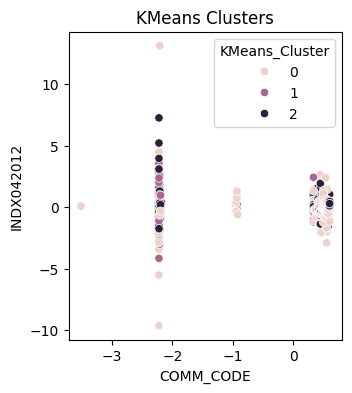

In [ ]:
# Visualize clustering (using first 2 features)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df_norm['KMeans_Cluster'])
plt.title("KMeans Clusters")

Text(0.5, 1.0, 'DBSCAN Clusters')

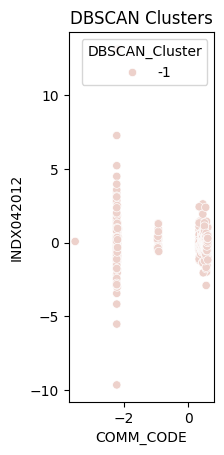

In [ ]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df_norm['DBSCAN_Cluster'])
plt.title("DBSCAN Clusters")

Text(0.5, 1.0, 'Agglomerative Clusters')

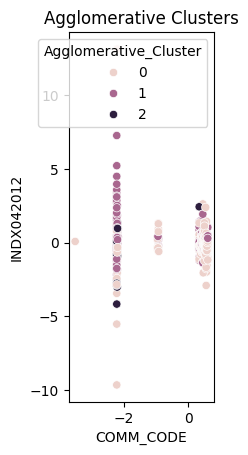

In [ ]:
plt.subplot(1, 3, 3)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df_norm['Agglomerative_Cluster'])
plt.title("Agglomerative Clusters")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Choosing a specific commodity
commodity_id = df['COMM_CODE'].unique()[0]  # with a specific ID
df_commodity = df[df['COMM_CODE'] == commodity_id]

In [ ]:
# Extracting monthly index columns
monthly_cols = [col for col in df.columns if col.startswith('INDX')]

In [ ]:
# Createing time series from index columns
ts = df_commodity[monthly_cols].values.flatten()
ts = pd.Series(ts, index=pd.date_range(start='2012-04-01', periods=len(monthly_cols), freq='MS'))

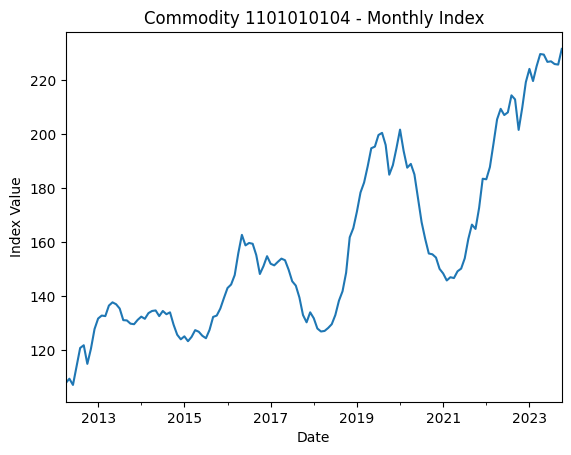

In [ ]:
#Ploting the time series
import matplotlib.pyplot as plt
ts.plot(title=f"Commodity {commodity_id} - Monthly Index")
plt.ylabel("Index Value")
plt.xlabel("Date")
plt.show()

In [ ]:
pip install pandas numpy matplotlib statsmodels gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import joblib
from datetime import datetime

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/wholesale.csv")

# Extract time series columns
monthly_cols = [col for col in df.columns if col.startswith('INDX')]
date_index = pd.date_range(start='2012-04-01', periods=len(monthly_cols), freq='MS')

# Dictionary to hold all trained models
arima_models = {}

# Train model for each commodity
for _, row in df.iterrows():
    comm_code = str(row['COMM_CODE'])
    ts_values = row[monthly_cols].values.astype(float)
    ts = pd.Series(ts_values, index=date_index)

    # Train ARIMA model
    try:
        model = ARIMA(ts, order=(5, 1, 2))
        model_fit = model.fit()
        arima_models[comm_code] = model_fit
    except Exception as e:
        print(f"Skipping {comm_code} due to error: {e}")

# Save all models in one file
joblib.dump(arima_models, "all_commodity_arima_models.pkl")

print("✅ Trained and saved ARIMA models for all commodities in one .pkl file.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Skipping 1317010012 due to error: LU decomposition error.


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Skipping 1318140004 due to error: LU decomposition error.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels

✅ Trained and saved ARIMA models for all commodities in one .pkl file.


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
forecast, test, mape = forecast_arima(comm_code=1101010104, forecast_months=6)

print("📈 Forecast:\n", forecast)
print("✅ Actual:\n", test)
print("📊 MAPE (Accuracy):", mape)

NameError: name 'forecast_arima' is not defined